# Imports

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.models import Sequential
from keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from PIL import Image
import pandas as pd

In [4]:
DATA_PATH = "/home/moez/Desktop/image_data/dog_breeds"

# Showing Images

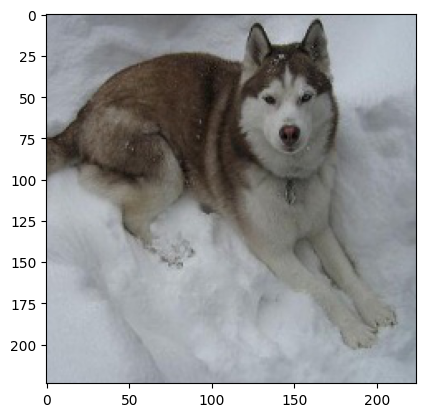

In [3]:
img = Image.open(DATA_PATH + "/train/" + "Siberian Husky/50.jpg" )
plt.imshow(img)

In [4]:
TRAIN_DIR = DATA_PATH + "/train/"
VAL_DIR = DATA_PATH + "/valid/"

# Image Preprocessing

In [5]:
train_data_gen = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2)

HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 16

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size = (HEIGHT, WIDTH),
                                                     color_mode = 'rgb',
                                                     batch_size = BATCH_SIZE,
                                                     class_mode ='categorical',
                                                     shuffle = True)

val_data_gen = ImageDataGenerator()

val_generator = val_data_gen.flow_from_directory(VAL_DIR,
                                                   target_size = (HEIGHT, WIDTH),
                                                   color_mode = 'rgb',
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'categorical',
                                                   shuffle = False)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [6]:
# Labels
labels = train_generator.class_indices
class_mapping = dict((v,k) for k,v in labels.items())
class_mapping

{0: 'Afghan',
 1: 'African Wild Dog',
 2: 'Airedale',
 3: 'American Hairless',
 4: 'American Spaniel',
 5: 'Basenji',
 6: 'Basset',
 7: 'Beagle',
 8: 'Bearded Collie',
 9: 'Bermaise',
 10: 'Bichon Frise',
 11: 'Blenheim',
 12: 'Bloodhound',
 13: 'Bluetick',
 14: 'Border Collie',
 15: 'Borzoi',
 16: 'Boston Terrier',
 17: 'Boxer',
 18: 'Bull Mastiff',
 19: 'Bull Terrier',
 20: 'Bulldog',
 21: 'Cairn',
 22: 'Chihuahua',
 23: 'Chinese Crested',
 24: 'Chow',
 25: 'Clumber',
 26: 'Cockapoo',
 27: 'Cocker',
 28: 'Collie',
 29: 'Corgi',
 30: 'Coyote',
 31: 'Dalmation',
 32: 'Dhole',
 33: 'Dingo',
 34: 'Doberman',
 35: 'Elk Hound',
 36: 'French Bulldog',
 37: 'German Sheperd',
 38: 'Golden Retriever',
 39: 'Great Dane',
 40: 'Great Perenees',
 41: 'Greyhound',
 42: 'Groenendael',
 43: 'Irish Spaniel',
 44: 'Irish Wolfhound',
 45: 'Japanese Spaniel',
 46: 'Komondor',
 47: 'Labradoodle',
 48: 'Labrador',
 49: 'Lhasa',
 50: 'Malinois',
 51: 'Maltese',
 52: 'Mex Hairless',
 53: 'Newfoundland',
 54

# Model

In [7]:
prmobile = Sequential([Input((HEIGHT,WIDTH,3)),
                             Lambda(preprocess_input)])

mobilenet = MobileNetV2(input_shape = (224,224,3), include_top = False)

pomobile = Sequential([GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(70, activation = 'softmax')])

model = Sequential([prmobile, mobilenet, pomobile])
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Building modem
model.build(((None, HEIGHT, WIDTH, 3)))

# prmobile.summary()
# mobilenet.summary()
# pomobile.summary()

2022-11-06 06:51:52.403868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 06:51:52.419525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 06:51:52.420048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 06:51:52.421069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 sequential_1 (Sequential)   (None, 70)                89670     
                                                                 
Total params: 2,347,654
Trainable params: 2,313,542
Non-trainable params: 34,112
_________________________________________________________________
None


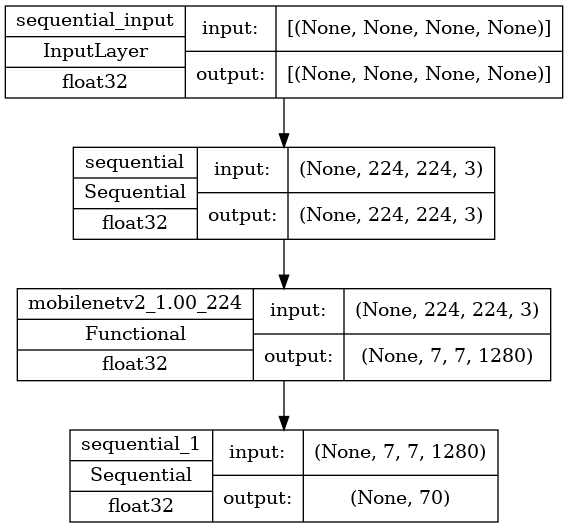

In [10]:
def draw(model):
    import tensorflow as tf
    model_img_file = 'model.png'
    return tf.keras.utils.plot_model(model, to_file=model_img_file, 
                            show_shapes=True, 
                            show_layer_activations=True, 
                            show_dtype=True,
                            show_layer_names=True)
draw(model)

# Training

In [9]:
EPOCHS = 20
train_cb = ModelCheckpoint('./model/', save_best_only = True)

model.fit(train_generator, validation_data = val_generator, callbacks = [train_cb], epochs = EPOCHS)

Epoch 1/20


2022-11-06 06:52:02.253608: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


497/497 [==============================] - ETA: 0s - loss: 3.9552 - accuracy: 0.1011

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 133s 249ms/step - loss: 3.9552 - accuracy: 0.1011 - val_loss: 2.9745 - val_accuracy: 0.3629
Epoch 2/20
497/497 [==============================] - ETA: 0s - loss: 2.7438 - accuracy: 0.3855

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 114s 230ms/step - loss: 2.7438 - accuracy: 0.3855 - val_loss: 1.6974 - val_accuracy: 0.6157
Epoch 3/20
497/497 [==============================] - ETA: 0s - loss: 1.8537 - accuracy: 0.5846

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 108s 216ms/step - loss: 1.8537 - accuracy: 0.5846 - val_loss: 1.0850 - val_accuracy: 0.7714
Epoch 4/20
497/497 [==============================] - ETA: 0s - loss: 1.3603 - accuracy: 0.6824

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 108s 218ms/step - loss: 1.3603 - accuracy: 0.6824 - val_loss: 0.7958 - val_accuracy: 0.8386
Epoch 5/20
497/497 [==============================] - ETA: 0s - loss: 1.0762 - accuracy: 0.7405

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 109s 219ms/step - loss: 1.0762 - accuracy: 0.7405 - val_loss: 0.6593 - val_accuracy: 0.8614
Epoch 6/20
497/497 [==============================] - ETA: 0s - loss: 0.9028 - accuracy: 0.7728

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 108s 216ms/step - loss: 0.9028 - accuracy: 0.7728 - val_loss: 0.5859 - val_accuracy: 0.8900
Epoch 7/20
497/497 [==============================] - ETA: 0s - loss: 0.7957 - accuracy: 0.7957

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 113s 226ms/step - loss: 0.7957 - accuracy: 0.7957 - val_loss: 0.5371 - val_accuracy: 0.8929
Epoch 8/20
497/497 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.8188

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 118s 237ms/step - loss: 0.6962 - accuracy: 0.8188 - val_loss: 0.4969 - val_accuracy: 0.9114
Epoch 9/20
497/497 [==============================] - ETA: 0s - loss: 0.6225 - accuracy: 0.8335

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 121s 244ms/step - loss: 0.6225 - accuracy: 0.8335 - val_loss: 0.4788 - val_accuracy: 0.9057
Epoch 10/20
497/497 [==============================] - ETA: 0s - loss: 0.5697 - accuracy: 0.8481

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 116s 233ms/step - loss: 0.5697 - accuracy: 0.8481 - val_loss: 0.4695 - val_accuracy: 0.9129
Epoch 11/20
497/497 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.8480

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 120s 240ms/step - loss: 0.5398 - accuracy: 0.8480 - val_loss: 0.4602 - val_accuracy: 0.9171
Epoch 12/20
497/497 [==============================] - ETA: 0s - loss: 0.4948 - accuracy: 0.8646

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 112s 226ms/step - loss: 0.4948 - accuracy: 0.8646 - val_loss: 0.4508 - val_accuracy: 0.9157
Epoch 13/20
497/497 [==============================] - ETA: 0s - loss: 0.4497 - accuracy: 0.8730

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 112s 225ms/step - loss: 0.4497 - accuracy: 0.8730 - val_loss: 0.4357 - val_accuracy: 0.9271
Epoch 14/20
497/497 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8870

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 110s 221ms/step - loss: 0.4218 - accuracy: 0.8870 - val_loss: 0.4316 - val_accuracy: 0.9257
Epoch 15/20
497/497 [==============================] - 86s 174ms/step - loss: 0.4137 - accuracy: 0.8838 - val_loss: 0.4317 - val_accuracy: 0.9243
Epoch 16/20
497/497 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8943

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 110s 221ms/step - loss: 0.3828 - accuracy: 0.8943 - val_loss: 0.4316 - val_accuracy: 0.9286
Epoch 17/20
497/497 [==============================] - ETA: 0s - loss: 0.3656 - accuracy: 0.8972

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


497/497 [==============================] - 110s 220ms/step - loss: 0.3656 - accuracy: 0.8972 - val_loss: 0.4235 - val_accuracy: 0.9300
Epoch 18/20
497/497 [==============================] - 90s 181ms/step - loss: 0.3377 - accuracy: 0.9049 - val_loss: 0.4251 - val_accuracy: 0.9286
Epoch 19/20
497/497 [==============================] - 95s 192ms/step - loss: 0.3149 - accuracy: 0.9152 - val_loss: 0.4286 - val_accuracy: 0.9257
Epoch 20/20
497/497 [==============================] - 98s 196ms/step - loss: 0.3082 - accuracy: 0.9114 - val_loss: 0.4256 - val_accuracy: 0.9286


# Classifying Images

In [9]:
import keras
from PIL import Image
model = keras.models.load_model('./model/')

In [2]:
def convert(prob):
    return "{:.2f}".format(float(prob*100))

1/1 [==============================] - 0s 34ms/step
This dog is a  Siberian Husky


,Breed,Probability
67,Siberian Husky,99.68
35,Elk Hound,0.09
65,Shiba Inu,0.08
15,Borzoi,0.01
42,Groenendael,0.01
...,...,...
25,Clumber,0.00
61,Saint Bernard,0.00
68,Vizsla,0.00
13,Bluetick,0.00


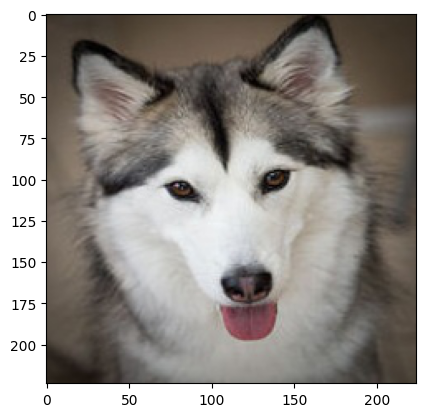

In [16]:
img = Image.open(DATA_PATH + "/test/" + "Siberian Husky/" + "01.jpg")
plt.imshow(img);

img = np.array(img).reshape(1, HEIGHT, WIDTH, 3)
predictions = model.predict(img)
prediction_probs = np.array(predictions)
argmaxs = np.argmax(prediction_probs, axis=1)
dog_breed = class_mapping[argmaxs[0]]
print("This dog is a " , dog_breed)
probs = prediction_probs
dog_breeds = list(class_mapping.values())
result = pd.DataFrame({})
result["Breed"] = dog_breeds
result["Probability"] = probs[0]
result.sort_values("Probability", ascending=False, inplace=True)
result["Probability"] = result["Probability"].apply(convert)
result